# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [1]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.reporting.figures import PortfolioPlot
from surfingcrypto.reporting.figures import CalendarPlot

In [2]:
coins={
    "BTC":"",
    "ETH":"",
    "MATIC":"",
    "ADA":"",
    "SOL":""
}
c = Config(coins,"/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")


In [3]:
p = Portfolio("coinbase", configuration=c)



### PORTFOLIO 
MyCoinbase( isHistoric:True, N_accounts:32)
Warning! There are 14 transactionsthat were EXCLUDED in df.
Warning! Errors while handling transactions:
TransactionsHistory(Transactions:211 - Processed:211, Unhandled:0 - Errors:9)


In [4]:
p.coinbase.active_accounts


['USDC']

In [5]:
p.df.tail()


,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,transaction_id,transaction_type_id
datetime,,,,,,,,,,,
2022-05-08T10:31:37Z,sell,0.237942,ETH,577.03,EUR,NaN,NaN,5.600,2425.087907,88c0ad78-7767-5d45-b05a-783e950af60d,70dae0d2-56b4-5045-85e8-11e95d078b41
2022-05-08T10:32:22Z,buy,252.420433,USDC,239.29,EUR,NaN,NaN,2.520,0.947982,bf77b834-e228-5642-8b6d-9ee08aceed22,d7d9fa15-9972-5b5b-a2c7-5e7ce94801dd
2022-05-08T10:32:23Z,sell,257.829804,MATIC,244.33,EUR,NaN,NaN,2.520,0.947641,a11ee786-d2e1-527e-b399-32c6c063b7ba,d7d9fa15-9972-5b5b-a2c7-5e7ce94801dd
2022-05-08T10:32:55Z,buy,94.364255,USDC,89.46,EUR,NaN,NaN,0.885,0.948028,2a294c2b-3cbc-5778-8748-8af404f94e56,ce4c9b02-d24f-5198-9d2b-3dbb8ba5ed2e
2022-05-08T10:32:56Z,sell,1.228168,SOL,91.23,EUR,NaN,NaN,0.885,74.281358,b49a6ef7-74aa-5117-b99e-7721e6f1dd67,ce4c9b02-d24f-5198-9d2b-3dbb8ba5ed2e


## Total fees

In [6]:
p.total_fees()


332.8499999999998

## Portfolio total investment`

Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [16]:
p.total_investment()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio value tracker

In [18]:
p.start_tracker(
    stocks_start="1-1-2021", benchmark="ETH",
)



The  `error_log` attributes contains the log from loading data.

In [19]:
p.tracker.error_log


[]

### Closedata

`Tracker` uses locally stored closedata to track the portfolio daily values.

In [20]:
p.tracker.closedata.tail()


,Date,Close,symbol
12949,2022-04-27 00:00:00+00:00,0.132365,DOGE
12950,2022-04-28 00:00:00+00:00,0.130776,DOGE
12951,2022-04-29 00:00:00+00:00,0.128064,DOGE
12952,2022-04-30 00:00:00+00:00,0.120980,DOGE
12953,2022-05-01 00:00:00+00:00,0.126030,DOGE


### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [21]:
p.tracker.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6
5,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854,13eeda10-e6c0-51d6-a799-54a399840255
6,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921,576000a6-1904-5f54-97a3-ade4ccc9b916
7,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980,332111be-8e28-5611-bb83-cb007f24c2f6
8,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730,c1c24d9e-966c-5cf9-a0cc-b79a68dfcbcb


### Portfolio calculations

All `daily_snapshots` are concatenated in a single dataframe, where for each row the following new attributes are calculated:

- Symbol Adj Close	    
- Adj cost daily	
- Benchmark Close	
- Benchmark DayOfBuy Close	
- Benchmark Equiv Shares	
- Benchmark Adj Cost Daily	
- symbol Return	
- Stock Gain / (Loss)	
- Benchmark Return	
- Benchmark Gain / (Loss)

In [22]:
p.tracker.daily_calcs

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-20 00:00:00+00:00,1936.596366,500.472817,1936.596366,1936.596366,0.258185,500.000000,0.015858,7.812817,0.000000,0.000000
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-21 00:00:00+00:00,1964.593249,507.708026,1964.593249,1936.596366,0.258185,507.228373,0.030544,15.048026,0.014457,7.228373
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-22 00:00:00+00:00,2000.536891,516.996908,2000.536891,1936.596366,0.258185,516.508480,0.049399,24.336908,0.033017,16.508480
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-23 00:00:00+00:00,1953.619811,504.872170,1953.619811,1936.596366,0.258185,504.395197,0.024788,12.212170,0.008790,4.395197
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-24 00:00:00+00:00,1828.220570,472.465360,1828.220570,1936.596366,0.258185,472.019002,-0.040991,-20.194640,-0.055962,-27.980998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2022-04-26 14:56:22+00:00,buy,0.237942,ETH,648.59,2725.833606,205116b5-2fda-544a-b3b7-ee5489ed487c,2022-05-06 00:00:00+00:00,2554.894640,607.916459,2554.894640,2638.634988,0.245805,628.006193,-0.062711,-40.673541,-0.031736,-20.583807
1872,2022-04-11 21:35:11+00:00,buy,0.006639,USDC,143.41,0.918329,03bdcb79-0bc1-597f-89c8-c4f444e811c1,2022-05-07 00:00:00+00:00,0.947931,0.006293,2499.068846,2740.696028,0.052326,130.766586,0.032234,0.000197,-0.088163,-12.643414
1873,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,eb373ce7-462b-5b42-9494-03bf322fa5af,2022-05-07 00:00:00+00:00,0.968122,249.610696,2499.068846,2637.787884,0.515830,1289.094565,-0.175473,-53.121217,-0.052589,-71.555435
1874,2022-04-13 21:13:35+00:00,buy,1.228168,SOL,118.00,96.078047,d4e078a5-cafa-5263-ba88-46c8cfd0df55,2022-05-07 00:00:00+00:00,74.877865,91.962611,2499.068846,2862.116169,0.041228,103.032199,-0.220656,-26.037389,-0.126846,-14.967801


### Daily snapshots

The module produces daily snapshots of the portfolio balance.
Each day can be accessed by selecting via the `Date Snapshot` column.

Either select a specifici day by specifing it with a string in `d-m-Y` forma or use `last` to get the last available snapshot.


In [23]:
p.tracker.daily_snaphost("last")


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
Date Snapshot,,,,,,,,,,,,,,,,,
2022-05-07 00:00:00+00:00,2022-04-11 21:35:11+00:00,buy,0.006639,USDC,143.41,0.918329,03bdcb79-0bc1-597f-89c8-c4f444e811c1,0.947931,0.006293,2499.068846,2740.696028,0.052326,130.766586,0.032234,0.000197,-0.088163,-12.643414
2022-05-07 00:00:00+00:00,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,eb373ce7-462b-5b42-9494-03bf322fa5af,0.968122,249.610696,2499.068846,2637.787884,0.515830,1289.094565,-0.175473,-53.121217,-0.052589,-71.555435
2022-05-07 00:00:00+00:00,2022-04-13 21:13:35+00:00,buy,1.228168,SOL,118.00,96.078047,d4e078a5-cafa-5263-ba88-46c8cfd0df55,74.877865,91.962611,2499.068846,2862.116169,0.041228,103.032199,-0.220656,-26.037389,-0.126846,-14.967801
2022-05-07 00:00:00+00:00,2022-04-26 14:56:22+00:00,buy,0.237942,ETH,648.59,2725.833606,205116b5-2fda-544a-b3b7-ee5489ed487c,2499.068846,594.633164,2499.068846,2638.634988,0.245805,614.283927,-0.083191,-53.956836,-0.052893,-34.306073


### Live snapshots

Get the live snapshot of the portfolio.

At the moment it does not feature updating benchmark calcs.


In [24]:
p.live_snapshot()

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id,Symbol Adj Close,Adj cost daily,symbol Return,Stock Gain / (Loss)
Date Snapshot,,,,,,,,,,,
2022-05-07 00:00:00+00:00,2022-04-11 21:35:11+00:00,buy,0.006639,USDC,143.41,0.918329,03bdcb79-0bc1-597f-89c8-c4f444e811c1,0.94807,0.006294,0.032386,0.000197
2022-05-07 00:00:00+00:00,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,eb373ce7-462b-5b42-9494-03bf322fa5af,0.92750,239.137143,-0.210070,-63.594770
2022-05-07 00:00:00+00:00,2022-04-13 21:13:35+00:00,buy,1.228168,SOL,118.00,96.078047,d4e078a5-cafa-5263-ba88-46c8cfd0df55,72.02000,88.452672,-0.250401,-29.547328
2022-05-07 00:00:00+00:00,2022-04-26 14:56:22+00:00,buy,0.237942,ETH,648.59,2725.833606,205116b5-2fda-544a-b3b7-ee5489ed487c,2412.91000,574.132366,-0.114799,-74.457634


### Daily grouped metrics

The `daily_grouped_metrics()` method can be used to extract from the `daily_calcs` dataframe a single grouped timeseries of a selecred set of variables.

In [25]:
p.tracker.daily_grouped_metrics(["Adj cost daily"]).tail()



variable,Adj cost daily
Date Snapshot,
2022-05-03,992.980264
2022-05-04,1050.344600
2022-05-05,979.693202
2022-05-06,958.338135
2022-05-07,936.212764


By default all different assets are summed together, otherwise it is possible to keep data separated by simbol, with `by_simbol` set as `True`.

In [26]:
p.tracker.daily_grouped_metrics(["Adj cost daily"], by_symbol=True).iloc[-5:].dropna(
    axis=1
)



Symbol,ETH,MATIC,SOL,USDC
variable,Adj cost daily,Adj cost daily,Adj cost daily,Adj cost daily
Date Snapshot,,,,
2022-05-03,629.242633,263.565564,100.165759,0.006308
2022-05-04,658.789578,284.272755,107.276016,0.006251
2022-05-05,620.656391,260.452580,98.577932,0.006299
2022-05-06,607.916459,255.215147,95.200233,0.006294
2022-05-07,594.633164,249.610696,91.962611,0.006293


Since `variables` is a list, we can compare multiple attributes.

In [27]:
df = p.tracker.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)", "Stock Gain / (Loss)"], by_symbol=True
)
df.tail()


Symbol                           AAVE                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                        NaN                 NaN   
2022-05-04                        NaN                 NaN   
2022-05-05                        NaN                 NaN   
2022-05-06                        NaN                 NaN   
2022-05-07                        NaN                 NaN   

Symbol                            ACH                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                        NaN                 NaN   
2022-05-04                        NaN                 NaN   
2022-05-05                        NaN                 NaN   
2022-05-06                        NaN                 NaN   
2022-05-07                        NaN                 NaN   

Symbol                            ADA                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                        NaN                 NaN   
2022-05-04                        NaN                 NaN   
2022-05-05                        NaN                 NaN   
2022-05-06                        NaN                 NaN   
2022-05-07                        NaN                 NaN   

Symbol                           ALGO                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                        NaN                 NaN   
2022-05-04                        NaN                 NaN   
2022-05-05                        NaN                 NaN   
2022-05-06                        NaN                 NaN   
2022-05-07                        NaN                 NaN   

Symbol                            AMP                      ...  \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-05-03                        NaN                 NaN  ...   
2022-05-04                        NaN                 NaN  ...   
2022-05-05                        NaN                 NaN  ...   
2022-05-06                        NaN                 NaN  ...   
2022-05-07                        NaN                 NaN  ...   

Symbol                            SOL                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                  -8.971012          -17.834241   
2022-05-04                  -3.851407          -10.723984   
2022-05-05                 -10.458751          -19.422068   
2022-05-06                 -12.666202          -22.799767   
2022-05-07                 -14.967801          -26.037389   

Symbol                          SUSHI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                        NaN                 NaN   
2022-05-04                        NaN                 NaN   
2022-05-05                        NaN                 NaN   
2022-05-06                        NaN                 NaN   
2022-05-07                        NaN                 NaN   

Symbol                            UNI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-03                        NaN                 NaN   
2022-05-04                        NaN                 NaN   
2022-05-05                        NaN                 NaN   
2022-05-06                        NaN                 NaN   
2022-05-07                        NaN                 NaN   

Symbol                           USDC           

## Portfolio figures

The `surfingcrypto.reporting.figures` modules containes a custom `PortfolioPlot` class that is designed to plot figures for the stock calculation, as *Adj cost daily*  or *Stock Gain / (Loss)*.

Data can be selected by passing the `variable` - and optionally `by_symbol`-  as to a `daily_grouped_metrics()` function. 

Moreover, with `zero_line`as `True` it is possible to add an horizontal line at 0.
### Portfolio daily value 

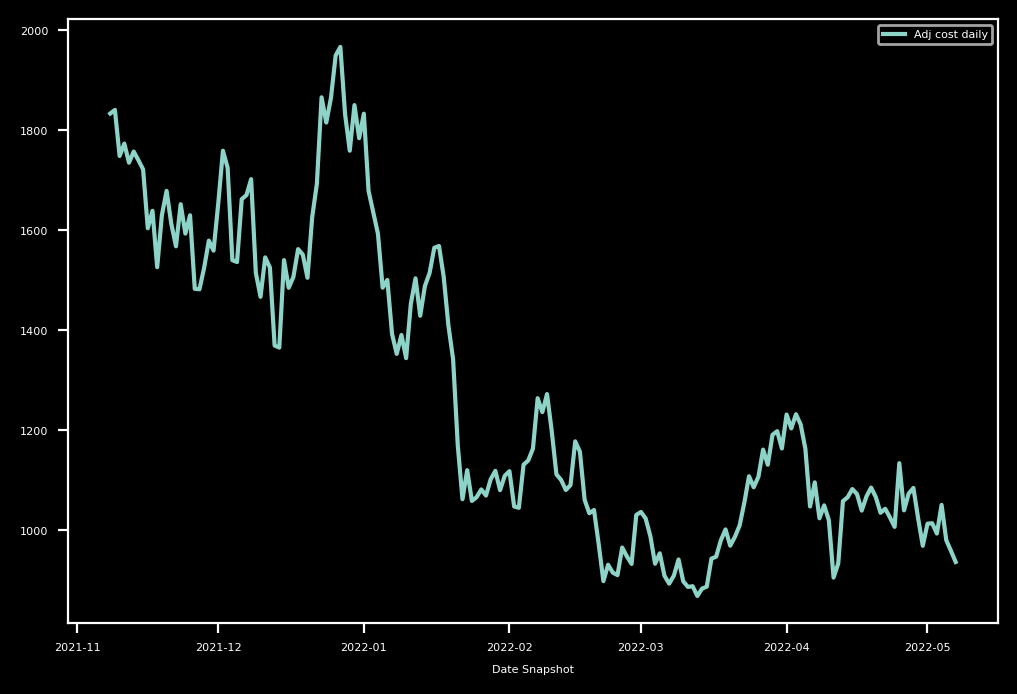

In [28]:
PortfolioPlot(variables=["Adj cost daily"], object=p, graphstart="6m")



### Portfolio gain/loss

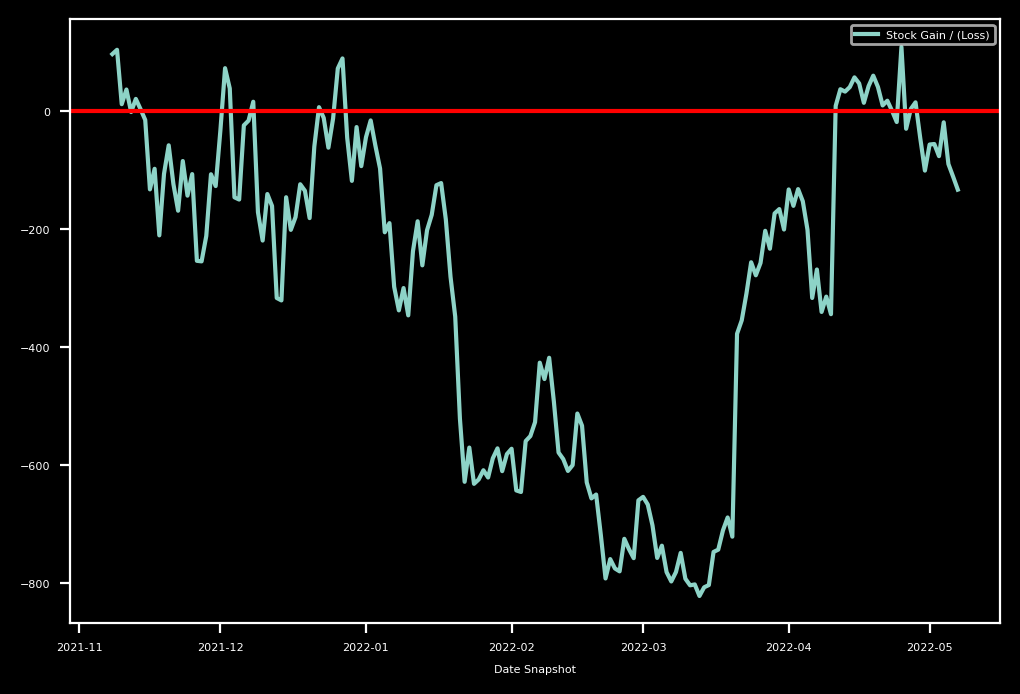

In [29]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



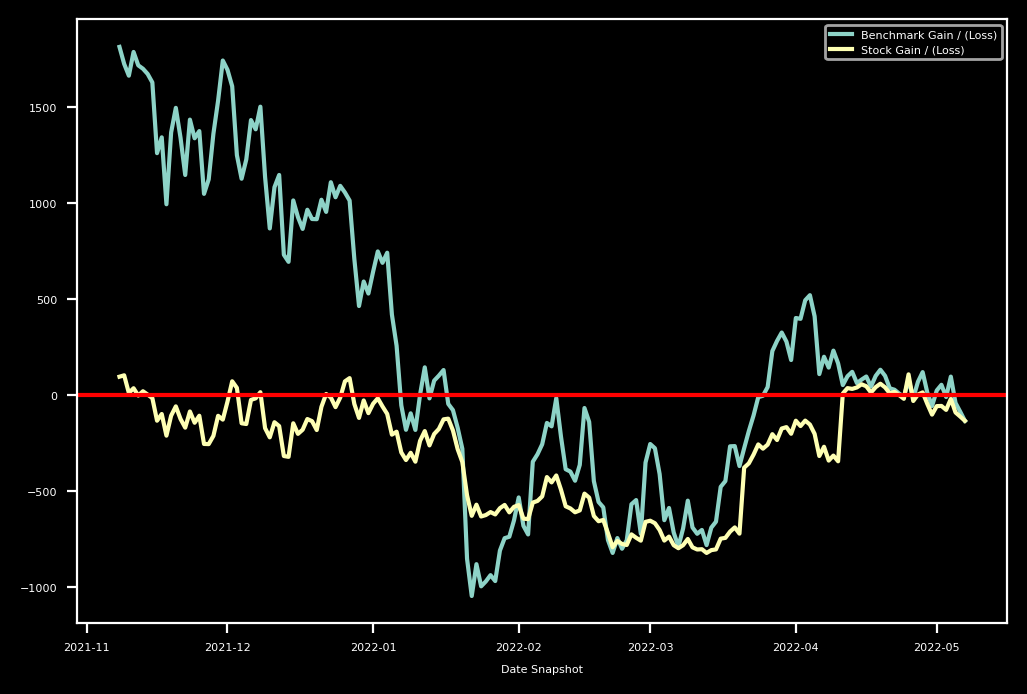

In [30]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)", "Benchmark Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



### Portfolio daily value by symbol


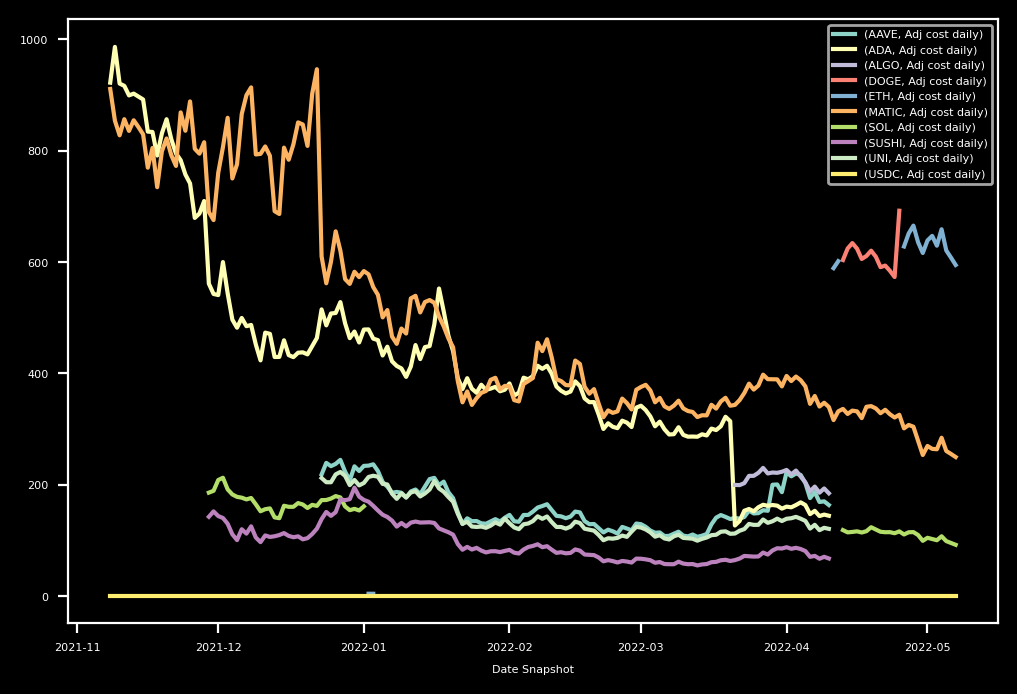

In [31]:
PortfolioPlot(
    variables=["Adj cost daily"], by_symbol=True, object=p, graphstart="6m"
)



### Stock gain by symbol

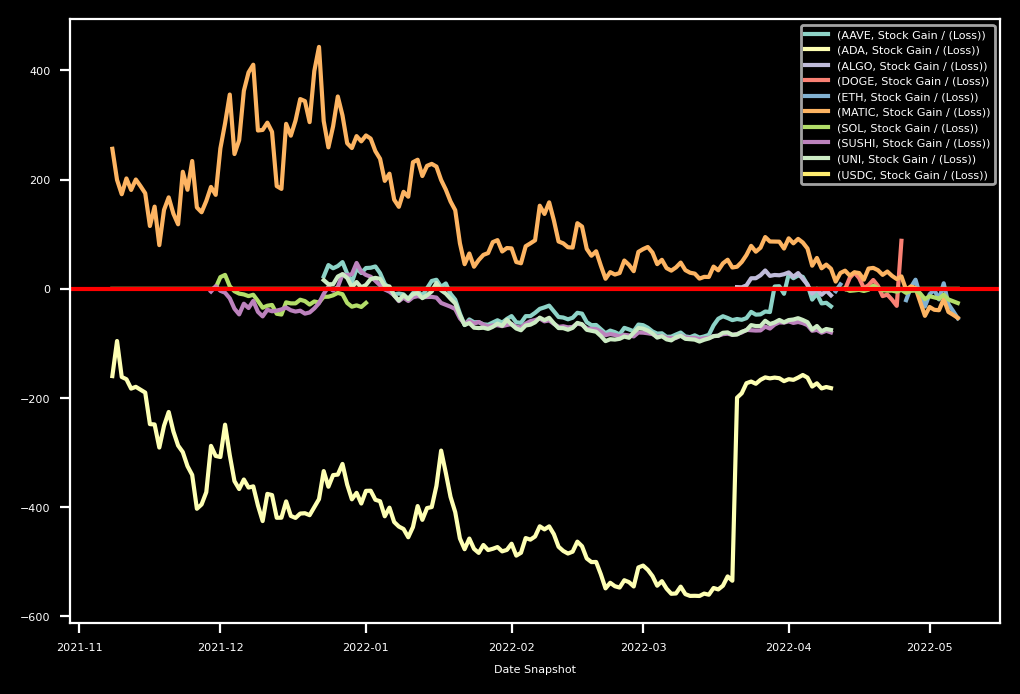

In [32]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    by_symbol=True,
    zero_line=True,
    object=p,
    graphstart="6m",
)


## Calendar plot

This calendar plot is a good visualisation of a variable in a calendar style.

The series passed as input must have a datetime index.


In [33]:
values = p.tracker.daily_grouped_metrics(["Stock Gain / (Loss)"])
values.index = pd.to_datetime(values.index)
values = values.reset_index().set_index("Date Snapshot")
values

variable,Stock Gain / (Loss)
Date Snapshot,
2021-04-20,7.812817
2021-04-21,15.048026
2021-04-22,24.336908
2021-04-23,12.212170
2021-04-24,-39.242299
...,...
2022-05-03,-76.347746
2022-05-04,-18.983411
2022-05-05,-89.634808


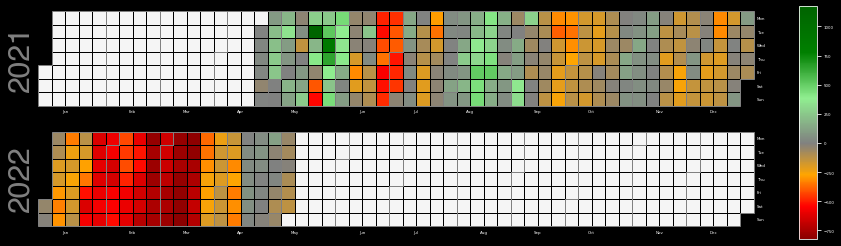

In [34]:
import pandas as pd
CalendarPlot(values=values)